<a href="https://colab.research.google.com/github/farinaelia/python-projects/blob/main/Extrovert_Vs_Introvert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the Extrovert vs. Introvert Behavior dataset
df = pd.read_csv('/content/personality_dataset.csv')
print("Dataset loaded successfully!\n")

Dataset loaded successfully!



In [49]:
print("--- All Column Names in Dataset ---\n")
print(df.columns)

--- All Column Names in Dataset ---

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')


## Exploratory Data Analysis (EDA)

EDA is a data analysis approach used to summarize and understand the main characteristics of a dataset. In this case, we will examine the data distribution, indentify outliers and explore relationships between variables for this dataset.

In [51]:
# First 5 Rows
print("--- First 5 Rows of the Dataset ---\n")
print(df.head())
print("\n" + "="*50 + "\n")

--- First 5 Rows of the Dataset ---

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  




In [52]:
# Information of Dataset
print("--- Dataset Information ---\n")
df.info()
print("\n" + "="*50 + "\n")


--- Dataset Information ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB




In [53]:
# Check for Missing Values
print("--- Missing Values in the Dataset ---\n")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

--- Missing Values in the Dataset ---

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64




In [54]:
# Descriptive Statistics
print("--- Descriptive Statistics for Numerical Columns ---\n")
print(df.describe()) # shows count, mean, std, min, max for numerical columns
print("\n" + "="*50 + "\n")

--- Descriptive Statistics for Numerical Columns ---

       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000 

In [55]:
print("--- Value Counts for Categorical Columns ---\n")
for col in df.select_dtypes(include='object').columns:
    if col != 'Personality':
      print(f"\nValue counts for '{col}':\n")
      print(df[col].value_counts())
    print("\n" + "="*50 + "\n")

--- Value Counts for Categorical Columns ---


Value counts for 'Stage_fear':

Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64



Value counts for 'Drained_after_socializing':

Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64






In [56]:
print("--- Distribution of the Target Variable ('Personality') ---")
print(df['Personality'].value_counts())
# Also show as percentage
print(df['Personality'].value_counts(normalize=True) * 100)
print("\n" + "="*50 + "\n")

--- Distribution of the Target Variable ('Personality') ---
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64
Personality
Extrovert    51.413793
Introvert    48.586207
Name: proportion, dtype: float64




--- Visualizing Distribution of Numerical Features ---



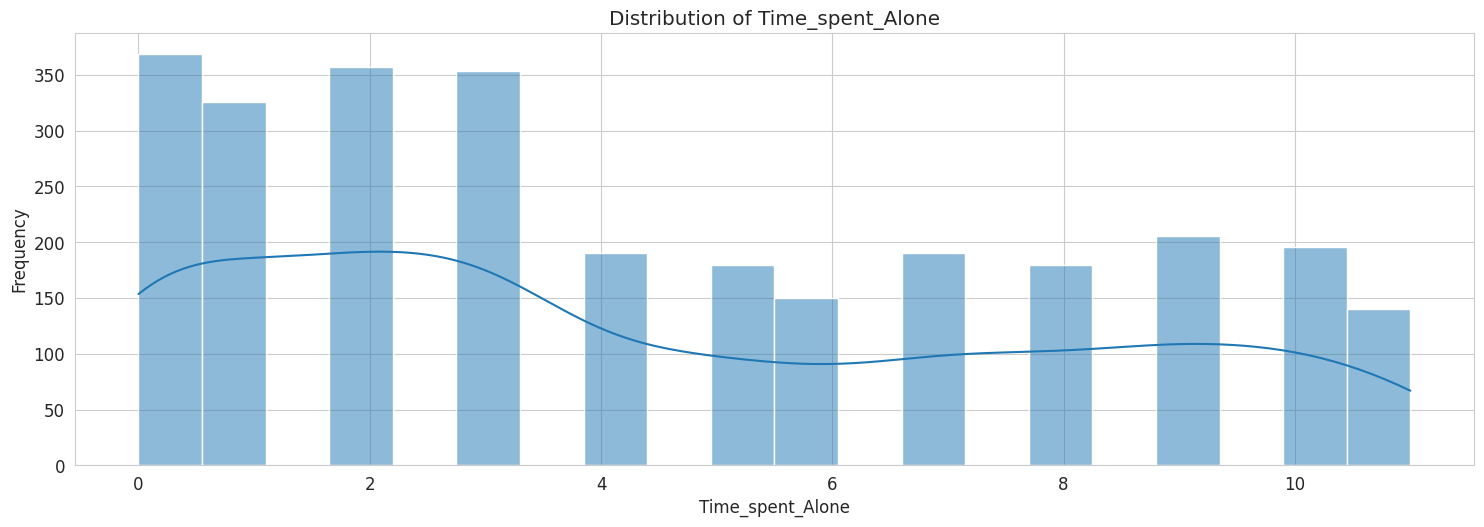

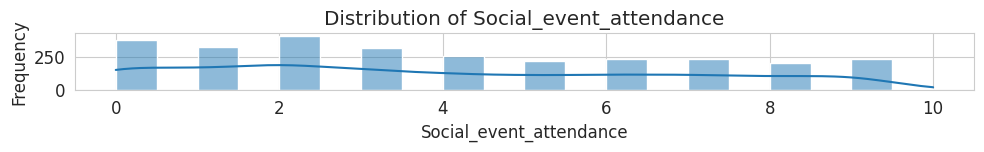

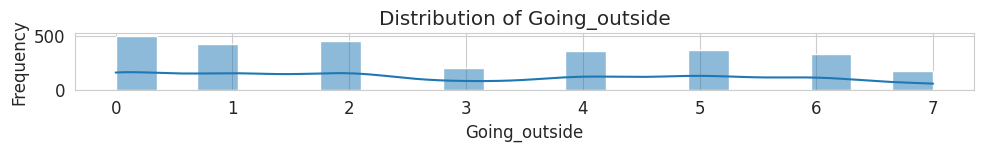

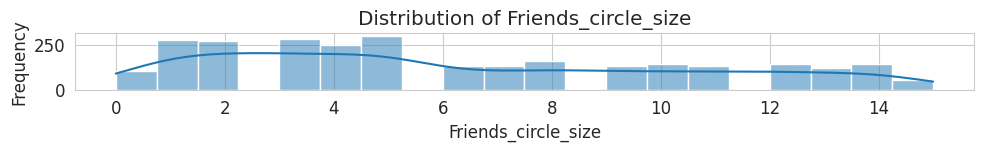

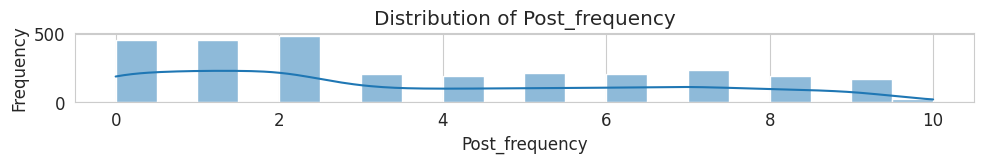

In [57]:
print("--- Visualizing Distribution of Numerical Features ---\n")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns # get numerical columns

# creating a figure to hold multiple plots
plt.figure(figsize=(15, 5 * len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print("\n" + "="*50 + "\n")


--- Visualizing Distributions of Categorical Features ---


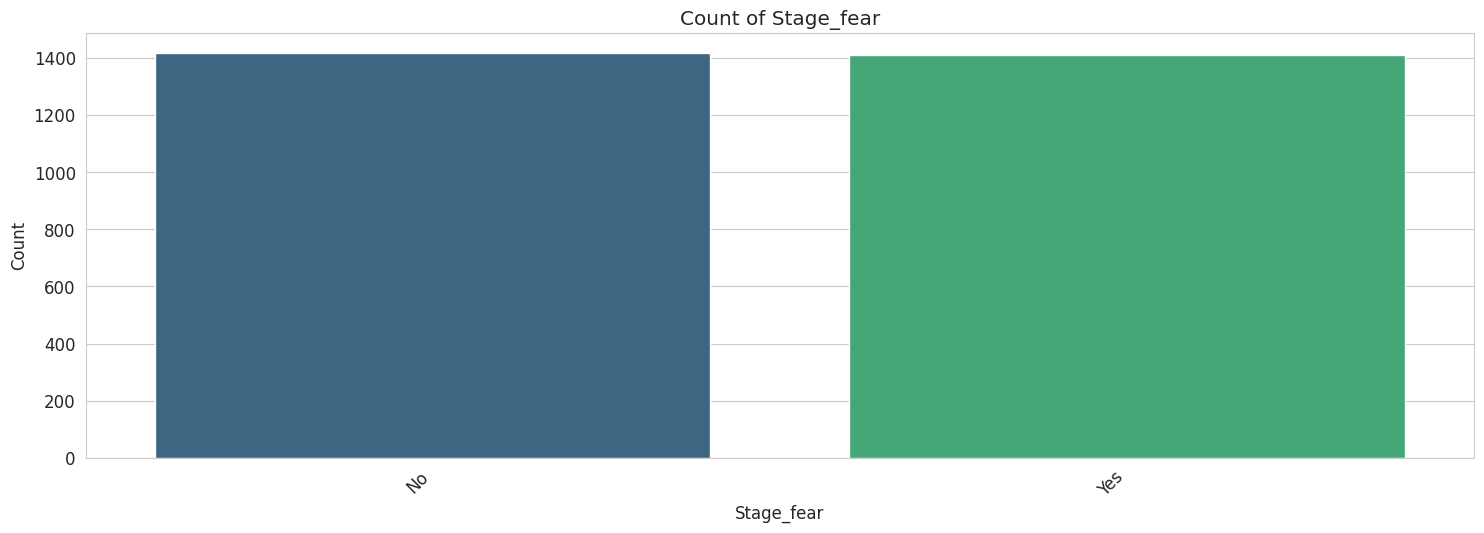

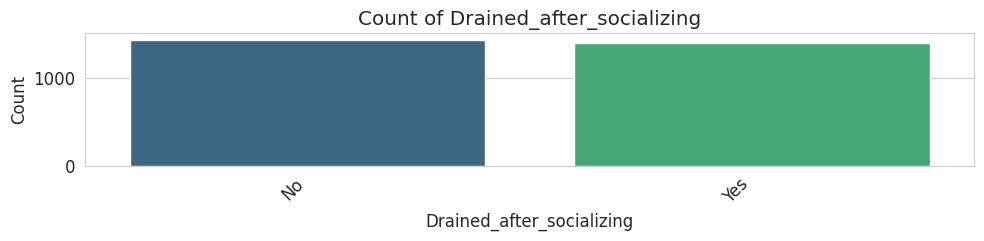

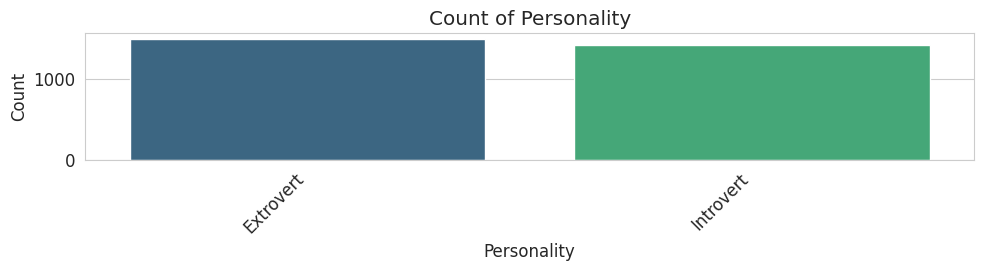

In [58]:
print("--- Visualizing Distributions of Categorical Features ---")
categorical_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(15, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols):
  plt.subplot(len(categorical_cols), 1, i + 1)
  sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, palette='viridis', legend=False)
  plt.title(f'Count of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
  print("\n" + "="*50 + "\n")

--- Relationship between Numerical Features and ('Personality') ---


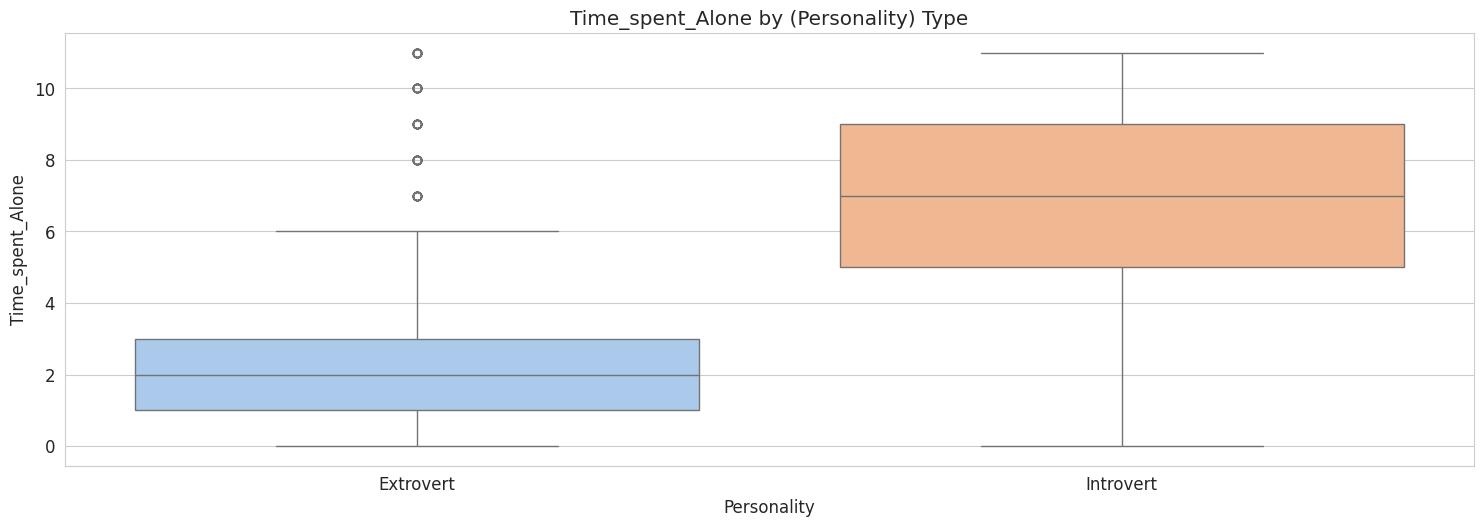

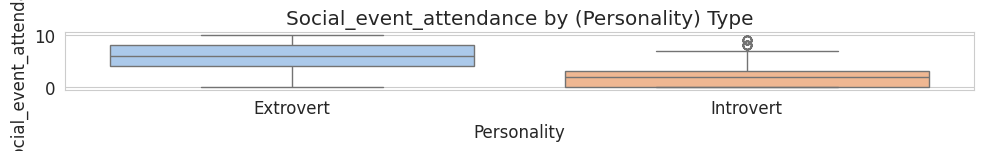

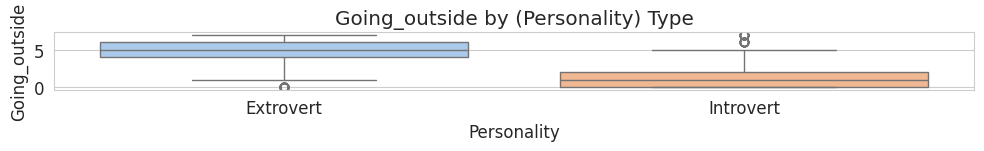

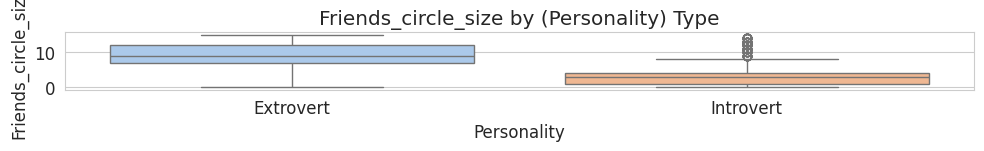

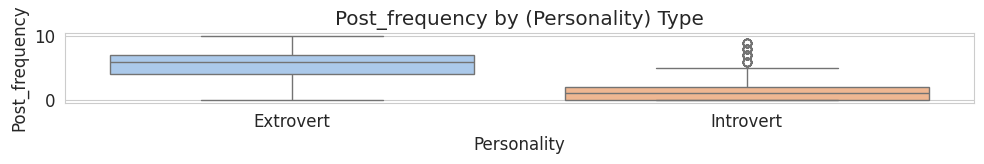

In [59]:
print(f"--- Relationship between Numerical Features and ('Personality') ---")

# Use box plots to see how numerical values differ between Extroverts and Introverts

plt.figure(figsize=(15, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):

  plt.subplot(len(numerical_cols), 1, i + 1)

# FIX: Assign 'hue=Personality' and set 'legend=False' for boxplot

  sns.boxplot(data=df, x='Personality', y=col, hue='Personality', palette='pastel', legend=False)

  plt.title(f'{col} by (Personality) Type')

  plt.xlabel('Personality')

  plt.ylabel(col)

  plt.tight_layout()

  plt.show()

  print("\n" + "="*50 + "\n")

--- Relationship between Categorical Features and '(Personality)' (Proportions) ---


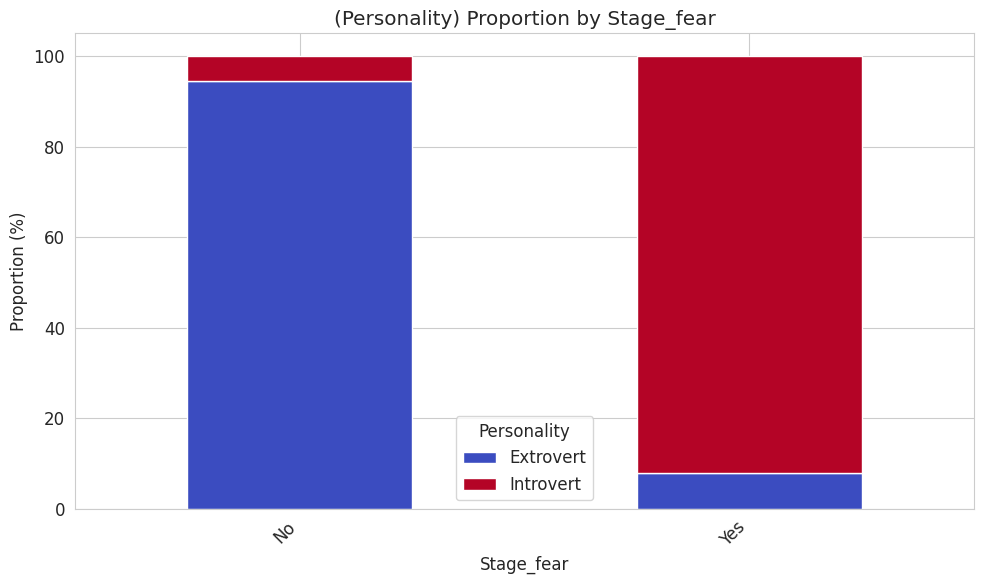

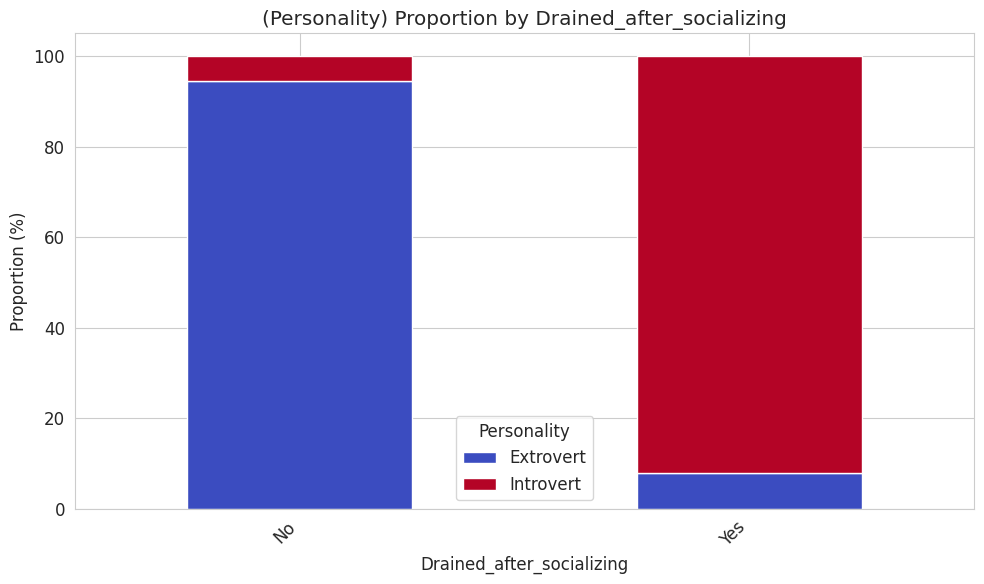

In [60]:
print(f"--- Relationship between Categorical Features and '(Personality)' (Proportions) ---")
# Loop through categorical columns (excluding the target column itself)
for col in df.select_dtypes(include='object').columns:
    if col != 'Personality':
        plt.figure(figsize=(10, 6))
        # Create a crosstab for proportions
        cross_tab = pd.crosstab(df[col], df['Personality'], normalize='index') * 100
        cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='coolwarm')
        plt.title(f'(Personality) Proportion by {col}')
        plt.xlabel(col)
        plt.ylabel('Proportion (%)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Personality')
        plt.tight_layout()
        plt.show()
print("\n" + "="*50 + "\n")


## Data Reprocessing and Issues

## Model Building

## Model Validating